In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df = pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx")

In [3]:
df.head(5)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


### Visualization

<Axes: >

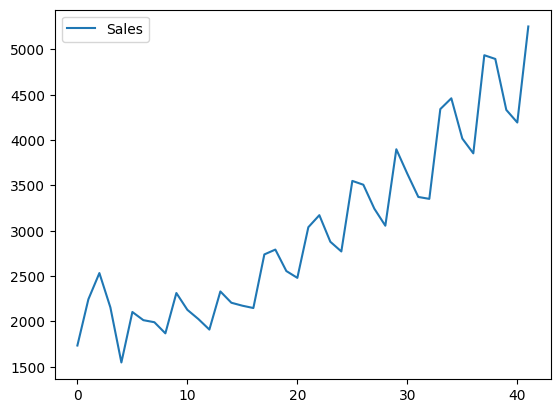

In [5]:
#Sales trend with date 
df.plot()

<Axes: >

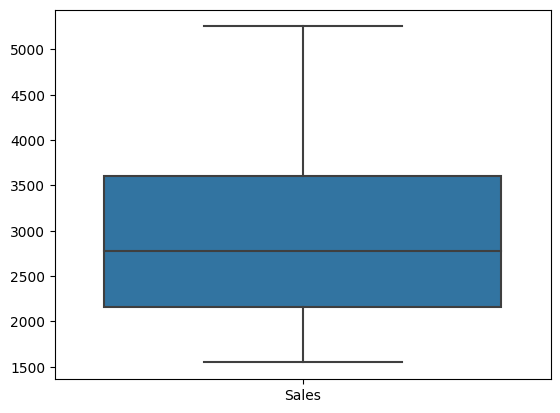

In [6]:
#checking data for the any outlier or noise
import seaborn as  sns
sns.boxplot(data =df)

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

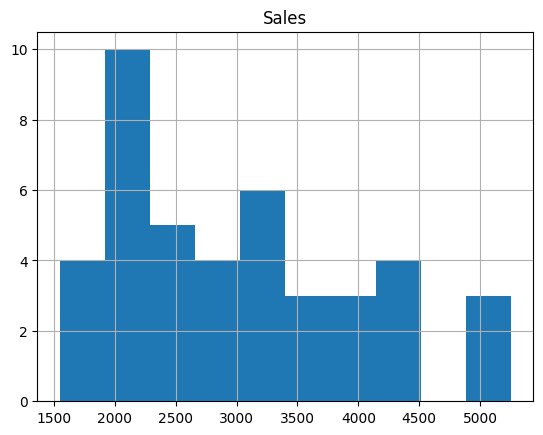

In [7]:
df.hist()

<Axes: ylabel='Density'>

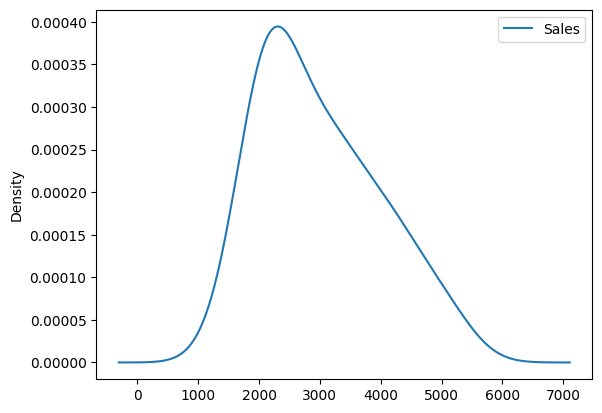

In [8]:
df.plot(kind="kde")

In [9]:
np.array(df["Sales"])

array([1734.82699966, 2244.96099854, 2533.80499268, 2154.96299744,
       1547.81899643, 2104.41199493, 2014.36299896, 1991.74699783,
       1869.04999924, 2313.63199615, 2128.31999969, 2026.82899857,
       1910.60399628, 2331.16499329, 2206.54999542, 2173.96799469,
       2148.27799988, 2739.30799866, 2792.7539978 , 2556.00999451,
       2480.97399902, 3039.522995  , 3172.11599731, 2879.00099945,
       2772.        , 3550.        , 3508.        , 3243.85999298,
       3056.        , 3899.        , 3629.        , 3373.        ,
       3352.        , 4342.        , 4461.        , 4017.        ,
       3854.        , 4936.        , 4895.        , 4333.        ,
       4194.        , 5253.        ])

<ipython-input-10-5f931c073f6b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  rk= sns.distplot(df['Sales'],kde=True)


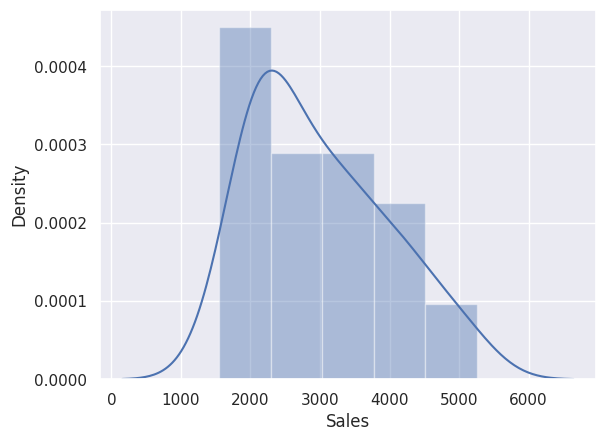

In [10]:
import seaborn as sns
sns.set_theme()
rk= sns.distplot(df['Sales'],kde=True)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

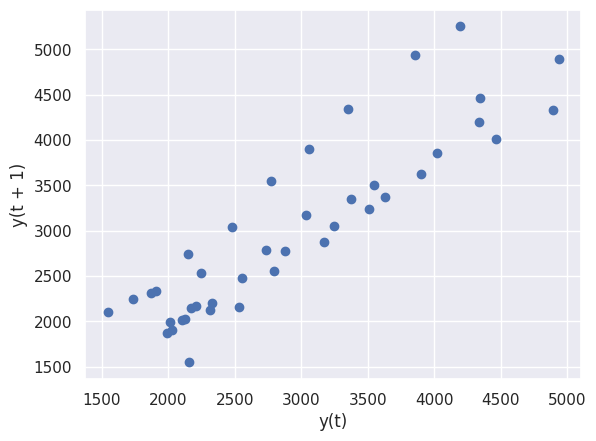

In [11]:
from pandas.plotting import lag_plot
lag_plot(df['Sales'])

## Preparing the Data for the pridiction 

In [12]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [13]:
len(df)

42

In [14]:
df['quarter'] = df['Quarter'].str[:2]

In [15]:
df.head(2)

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2


In [16]:
df['quarter'].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [17]:
df_dummies = pd.get_dummies(df['quarter'], prefix='Q')
df1 = df.join(df_dummies)

In [18]:
df.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [19]:
df1.head(2)

,Quarter,Sales,quarter,Q_Q1,Q_Q2,Q_Q3,Q_Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0


In [20]:
df1['t'] = np.arange(1,43)       #This column useful for capturing any trends or patterns that change over time.
df1['t_squared'] = df1['t']**2   #help to capture any non-linear relationships between the time variable and the response variable.
df1["Sales_log"] =np.log(df['Sales']) #help to normalize the data and reduce the impact of extreme values.

In [21]:
df1.head()

,Quarter,Sales,quarter,Q_Q1,Q_Q2,Q_Q3,Q_Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [22]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.2, random_state=0)


In [23]:
train.shape

(33, 10)

In [24]:
test.shape

(9, 10)

<Axes: >

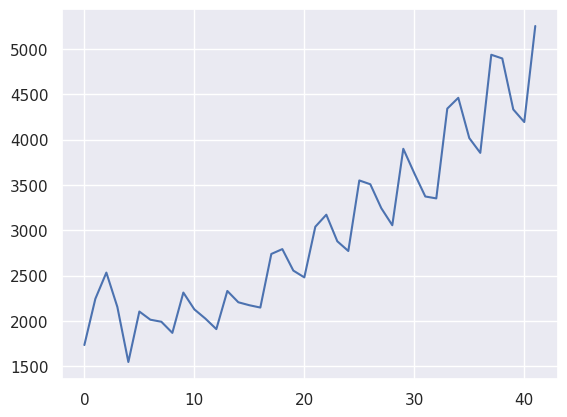

In [25]:
df1['Sales'].plot()

# Applying differnt Models to compare and choosing best one 

# Linear Model

In [26]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import numpy as np

# Fit a linear regression model to the training data
linear_model = smf.ols("Sales ~ t", data=train).fit()

# Make predictions on the test data using the linear model
linear_pred = linear_model.predict(test['t'])

# Calculate the RMSE of the linear model's predictions
linear_rmse = np.sqrt(mean_squared_error(test['Sales'], linear_pred))

# Print the RMSE
print("Linear model RMSE:", linear_rmse)

Linear model RMSE: 361.18841466914796


#Quadratic Model

In [27]:
# Fit a quadratic regression model to the training data
quad_model = smf.ols("Sales ~ t + t_squared", data=train).fit()

# Make predictions on the test data using the quadratic model
quad_pred = quad_model.predict(test[['t', 't_squared']])

# Calculate the RMSE of the quadratic model's predictions
quad_rmse = np.sqrt(mean_squared_error(test['Sales'], quad_pred))

# Print the RMSE
print("Quadratic model RMSE:", quad_rmse)

Quadratic model RMSE: 345.7382431571081


# Exponential model

In [28]:

# Fit an exponential regression model to the training data
exp_model = smf.ols("Sales_log ~ t", data=train).fit()

# Make predictions on the test data using the exponential model
exp_pred = exp_model.predict(test['t'])

# Calculate the RMSE of the exponential model's predictions
exp_rmse = np.sqrt(mean_squared_error(test['Sales'], np.exp(exp_pred)))

# Print the RMSE
print("Exponential model RMSE:", exp_rmse)

Exponential model RMSE: 354.73680387195037


In [29]:
# Define the RMSE values and model names as lists
rmse_values = [linear_rmse, exp_rmse, quad_rmse]
model_names = ["rmse_linear", "rmse_exp", "rmse_quad"]

# Create a DataFrame from the lists
table_rmse = pd.DataFrame({"MODEL": model_names, "RMSE_Values": rmse_values})

# Sort the DataFrame by RMSE values
table_rmse_sorted = table_rmse.sort_values(by="RMSE_Values")

# Print the sorted DataFrame
print(table_rmse_sorted)

         MODEL  RMSE_Values
2    rmse_quad   345.738243
1     rmse_exp   354.736804
0  rmse_linear   361.188415


#ARIMA Model

In [30]:
data = pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx",header=0,index_col=0, parse_dates=True)
data.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [31]:
# set the size of the validation set
val_size = 6

# determine the split point
split_point = len(data) - val_size

# split the data into train and validation sets
train1, validation_data = data[:split_point], data[split_point:]

# print the sizes of the train and validation sets
print(f"train1: {len(train1)}, validation_data: {len(validation_data)}")


train1: 36, validation_data: 6


In [32]:
train1.to_csv('train1.csv', header=False)
validation_data.to_csv('validation_data.csv', header=False)

In [33]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

train1 = read_csv('train1.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

train1

<ipython-input-33-bcbc3baf8881>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train1 = read_csv('train1.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Q4_94    4017.000000
Name: 1, dtype: float64

In [34]:
X = train1.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

###  Validation

In [35]:
history = [x for x in train]
prediction = list()
for i in range(len(test)):
    yhat = history[-1]
    prediction.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, prediction))
print('RMSE: %.3f' % rmse)

>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
>Predicted=3373.000, Expected=3352.000
>Predicted=3352.000, Expected=4342.000
>Predicted=4342.000, Expected=4461.000
>Predicted=4461.000, Expected=4017.000
RMSE: 424.558


In [36]:
models = ["rmse_linear", "rmse_exp", "rmse_quad", "RMSE_ARIMA"]
rmse_values = [linear_rmse, exp_rmse, quad_rmse, rmse]
table_rmse = pd.DataFrame({"MODEL": models, "RMSE_Values": rmse_values})
table_rmse = table_rmse.sort_values(by="RMSE_Values")
table_rmse

,MODEL,RMSE_Values
2,rmse_quad,345.738243
1,rmse_exp,354.736804
0,rmse_linear,361.188415
3,RMSE_ARIMA,424.557969


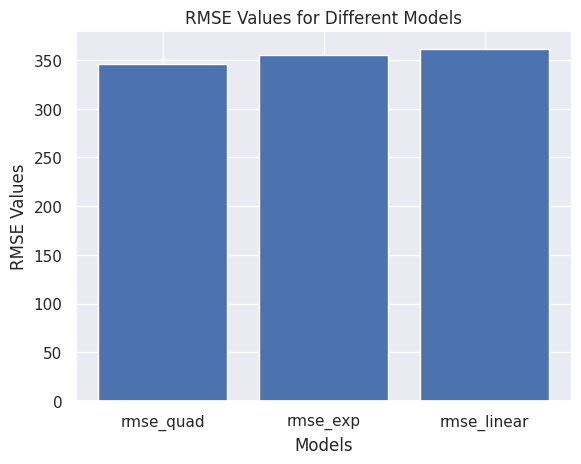

In [37]:
# Define the values
rmse_values = [linear_rmse, exp_rmse, quad_rmse]
model_names = ["rmse_linear", "rmse_exp", "rmse_quad"]

# Create a DataFrame from the lists
table_rmse = pd.DataFrame({"MODEL": model_names, "RMSE_Values": rmse_values})

# Sort the DataFrame by RMSE values
table_rmse_sorted = table_rmse.sort_values(by="RMSE_Values")

# Plot the bar chart
plt.bar(table_rmse_sorted["MODEL"], table_rmse_sorted["RMSE_Values"])
plt.title("RMSE Values for Different Models")
plt.xlabel("Models")
plt.ylabel("RMSE Values")
plt.show()

#Visual representation of all the models

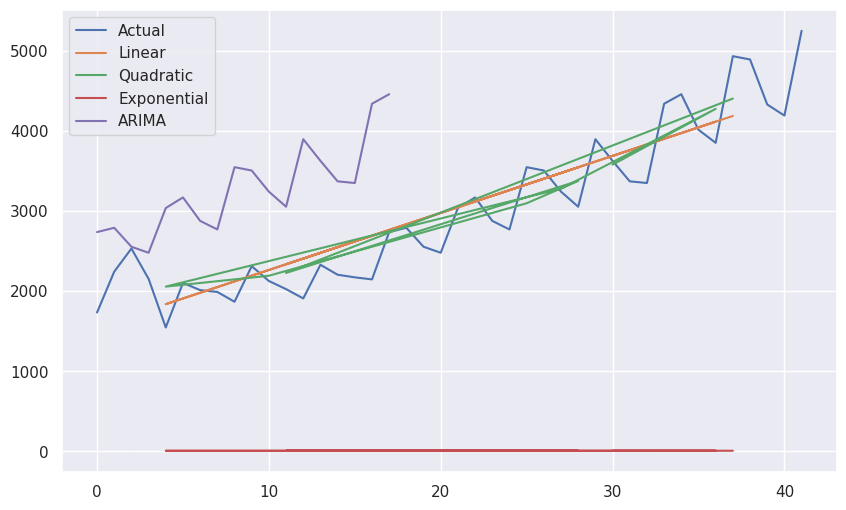

In [38]:
import matplotlib.pyplot as plt

# Create a list of model names and corresponding predictions
models = ["Linear", "Quadratic", "Exponential", "ARIMA"]
predictions = [linear_pred, quad_pred, exp_pred, prediction]

# Plot actual vs predicted values for each model
plt.figure(figsize=(10, 6))
plt.plot(df1['Sales'], label="Actual")
for i in range(len(models)):
    plt.plot(predictions[i], label=models[i])
plt.legend()
plt.show()